#    1. Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan *objective* yang ingin dicapai.

- Nama : Fahmi Suwandhi
- Batch : 10

# 2. Judul/Penanda Soal

#### Unsupervised Learning KMeans

# 3. Import Libraries

> *Cell* pertama pada *notebook* **harus berisi dan hanya berisi** semua *library* yang digunakan dalam *project*.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Library Input missing Value
from sklearn.impute import SimpleImputer

# Handling outlier
from feature_engine.outliers import Winsorizer

# Library Splitting Data
from sklearn.model_selection import train_test_split

# Feature Encoding
from sklearn.preprocessing import LabelEncoder

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Feature Encoding using OneHoTEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Features Model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans


# Metrics
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

# PCA
from sklearn.decomposition import PCA, FactorAnalysis

# 4. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Load Data
df = pd.read_csv('dataset.csv', encoding='ISO-8859-1')
print(df.shape)
df.head()

(223, 6)


,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


- Exp :
> kita dapat melihat ukuran dari data kita memiliki 223 baris dan 6 kolom

In [3]:
# Copy dataset original kedalam variabel df_copy
df_ori = df.copy()

# 5. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

<AxesSubplot:xlabel='Continent', ylabel='count'>

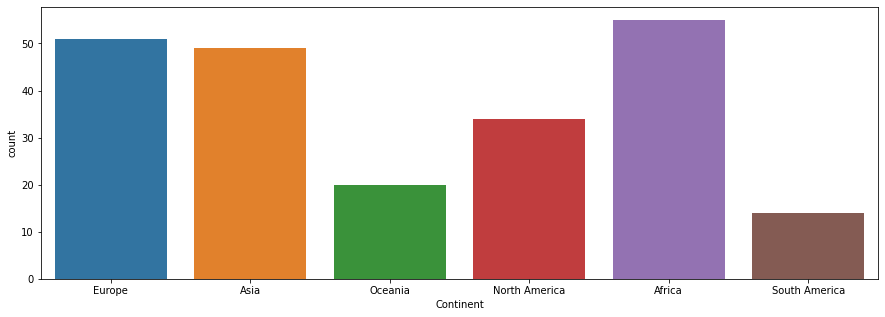

In [4]:
# Visualisasi calon DPK berdasarkan jenis pekerjaan
plt.figure(figsize=(15, 5))
sns.countplot(x=df['Continent'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


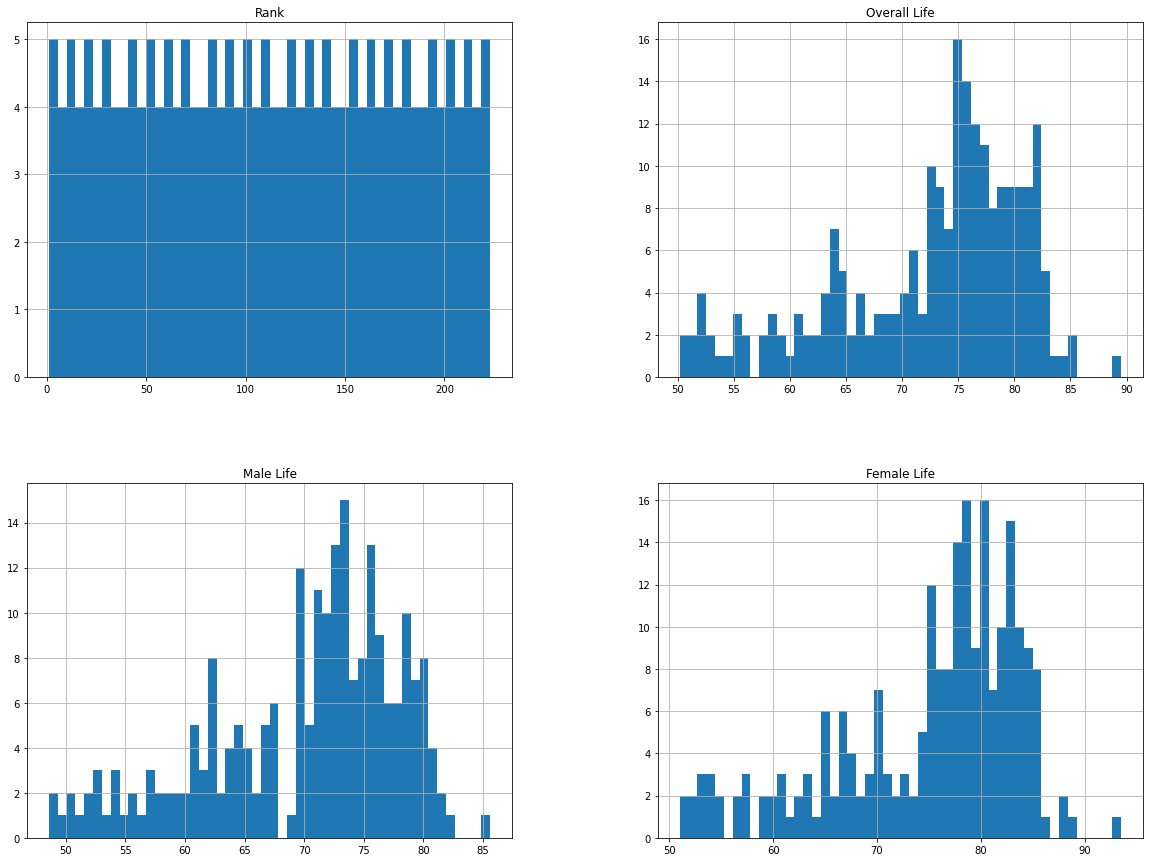

In [6]:
# Visualisasi persebaran data setiap columns
%matplotlib inline
import matplotlib.pyplot as plt
df.select_dtypes(include=np.number).hist(bins=50, figsize=(20,15))

plt.show()

# 6. Data processing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

#### 6.1 Cek Missing Value

In [7]:
# Cek Missing Value
df.isnull().sum()

Rank            0
Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64

- Exp :
> Dataset ini tidak memiliki missing value

#### 6.2 Features Engineering

In [8]:
# Kita akan drop kolom cust id karena tipe datanya object, untuk clustering lebih optimal jika tipe datanya numerik
df.drop(columns=['Rank','Country','Continent'], inplace=True)

# 7. Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

#### 7.1 KMeans Model

In [9]:
# Menggunakan Loop untuk menentukan titik siku
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

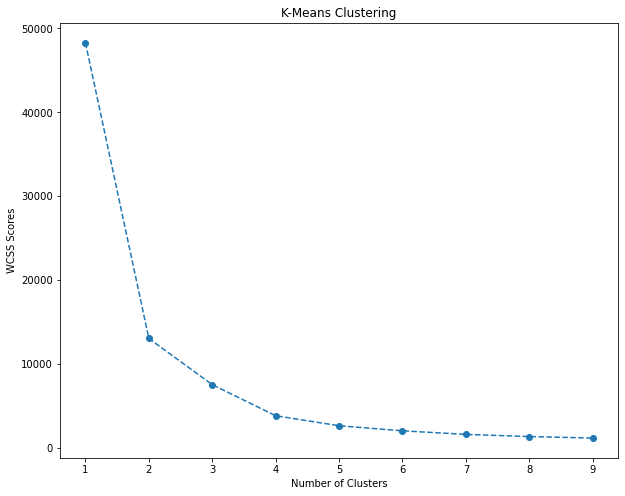

In [10]:
# Visualisasi Elbow Method
plt.figure(figsize=(10,8))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Scores')
plt.title('K-Means Clustering')
plt.show()



In [11]:
# Model Definition
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=3)
y_pred = kmeans.fit_predict(df)

In [12]:
# Menambah kolom cluster pada dataset
df_ori['cluster'] = kmeans.labels_
print(df_ori.shape)
df_ori.head(100)

(223, 7)


,Rank,Country,Overall Life,Male Life,Female Life,Continent,cluster
0,1,Monaco,89.5,85.6,93.5,Europe,2
1,2,Japan,85.0,81.7,88.5,Asia,2
2,3,Singapore,85.0,82.3,87.8,Asia,2
3,4,Macau; China,84.5,81.6,87.6,Asia,2
4,5,San Marino,83.3,80.7,86.1,Europe,2
...,...,...,...,...,...,...,...
95,96,Colombia,75.7,72.6,79.0,South America,0
96,97,Saint Kitts and Nevis,75.7,73.3,78.2,North America,0
97,98,Maldives,75.6,73.3,78.0,Asia,0
98,99,Mauritius,75.6,72.2,79.2,Africa,0


#### 7.2 PCA

In [13]:
# Define PCA
pca = PCA()
pca.fit(df)
pca.explained_variance_ratio_

array([9.91981497e-01, 7.75823717e-03, 2.60266052e-04])

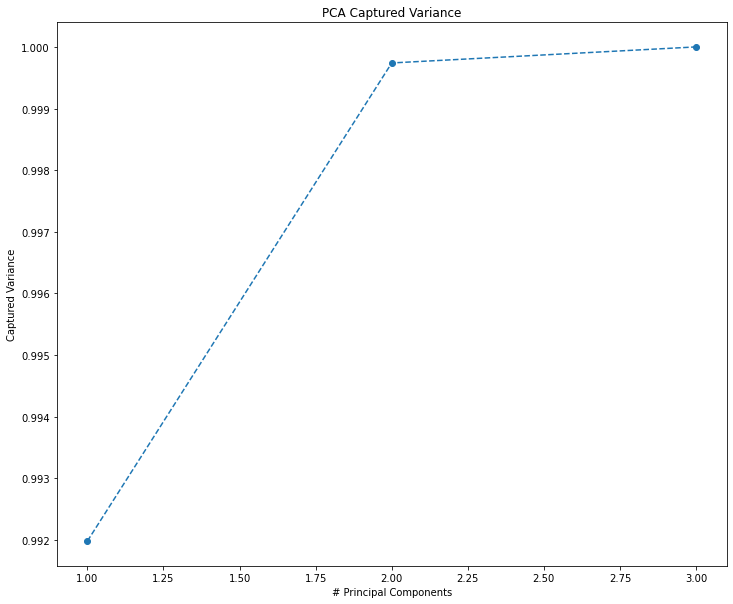

In [14]:
# Visualisasi PCA Variance
plt.figure(figsize=(12,10))
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', )
plt.title('PCA Captured Variance')
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()



In [15]:
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df)

In [16]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, -1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

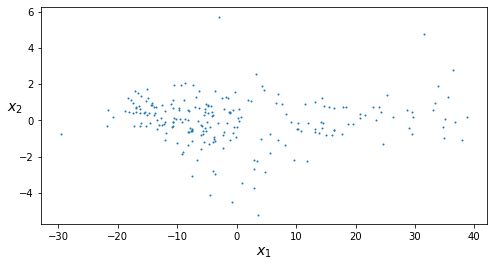

In [17]:
plt.figure(figsize=(8, 4))
plot_clusters(df_reduced)
plt.show()

In [18]:
# Looping setelah melakukan PCA
wcss = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans_pca.fit(df_reduced)
    wcss.append(kmeans_pca.inertia_)



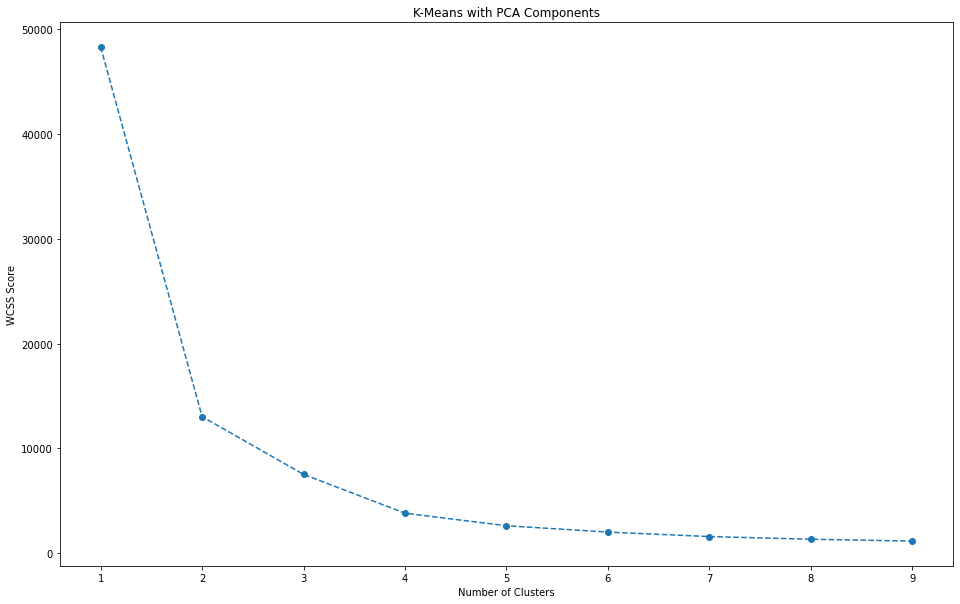

In [19]:
plt.figure(figsize=(16,10))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.title('K-Means with PCA Components')
plt.show()

- Exp :
    > jika di lihat dari elbow method KMeans setelah di lakukan PCA, titik siku pada gambar di atas berada di 2 cluster

In [20]:
# melakukan KMeans Method dengan 2 cluster
kmeans_pca = KMeans(n_clusters=2, init='k-means++', random_state=9)
kmeans_pca.fit(df_reduced)



KMeans(n_clusters=2, random_state=9)

In [21]:
df_ori['PCA_cluster'] = kmeans_pca.labels_
print(df_ori.shape)
df_ori.head(100)

(223, 8)


,Rank,Country,Overall Life,Male Life,Female Life,Continent,cluster,PCA_cluster
0,1,Monaco,89.5,85.6,93.5,Europe,2,0
1,2,Japan,85.0,81.7,88.5,Asia,2,0
2,3,Singapore,85.0,82.3,87.8,Asia,2,0
3,4,Macau; China,84.5,81.6,87.6,Asia,2,0
4,5,San Marino,83.3,80.7,86.1,Europe,2,0
...,...,...,...,...,...,...,...,...
95,96,Colombia,75.7,72.6,79.0,South America,0,0
96,97,Saint Kitts and Nevis,75.7,73.3,78.2,North America,0,0
97,98,Maldives,75.6,73.3,78.0,Asia,0,0
98,99,Mauritius,75.6,72.2,79.2,Africa,0,0


# 8. Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

In [22]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

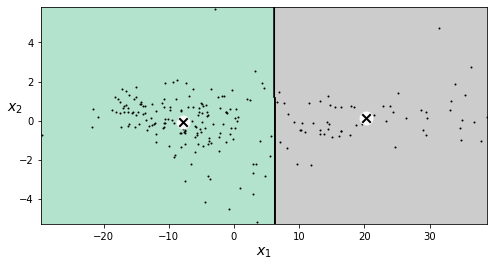

In [24]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_pca, df_reduced)
plt.show()

# 9. Pengambilan Kesimpulan

> Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

- obective dari model dataset ini merupakan mengklasifikasikan atau clustering untuk umur menjadi 2 kelompok
- model kmeans sebelum menggunakan PCA, titik siku berada di 3 pengelompokan atau 3 cluster
- model setelah dilakukan PCA, dapat di reduksi variance menjadi 2 dimennsi, dan ,jika dilihat adri elbow method nya titik siku berada di 2 cluster